# load cudf

# import

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (21, 9)
plt.rcParams['figure.dpi'] = 300

# read data

In [28]:
COLUMNS=[
    'manufacturer',
    'model',
    'vehicle_condition',
    'battery_capacity',
    'drivetrain',
    'mileage',
    'warranty_period',
    'accident_history',
    'year_of_manufacture',
]
SEED = 42

In [29]:
train = pd.read_csv('train.csv')
train = train.drop(columns=['ID'])
train.columns = COLUMNS + ['y']
train.manufacturer = train.manufacturer.str.replace('사', '_corp')

test = pd.read_csv('test.csv')
test = test.drop(columns=['ID'])
test.columns = COLUMNS
test_X = test
test_X.manufacturer = test_X.manufacturer.str.replace('사', '_corp')

In [30]:
train

,manufacturer,model,vehicle_condition,battery_capacity,drivetrain,mileage,warranty_period,accident_history,year_of_manufacture,y
0,P_corp,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K_corp,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A_corp,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A_corp,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,B_corp,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...
7492,H_corp,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,B_corp,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,P_corp,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,B_corp,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


# eda

In [31]:
train.dtypes

manufacturer            object
model                   object
vehicle_condition       object
battery_capacity       float64
drivetrain              object
mileage                  int64
warranty_period          int64
accident_history        object
year_of_manufacture      int64
y                      float64
dtype: object

In [32]:
train.select_dtypes(include='number')

,battery_capacity,mileage,warranty_period,year_of_manufacture,y
0,86.077,13642,0,2,159.66
1,56.000,10199,6,0,28.01
2,91.200,2361,7,0,66.27
3,NaN,21683,3,0,99.16
4,61.018,178205,1,0,62.02
...,...,...,...,...,...
7492,NaN,3773,10,0,35.95
7493,46.000,135411,2,0,23.40
7494,NaN,1363,2,0,120.00
7495,56.000,39445,6,2,24.00


In [33]:
train.isna().sum(), test.isna().sum()

(manufacturer              0
 model                     0
 vehicle_condition         0
 battery_capacity       2711
 drivetrain                0
 mileage                   0
 warranty_period           0
 accident_history          0
 year_of_manufacture       0
 y                         0
 dtype: int64,
 manufacturer             0
 model                    0
 vehicle_condition        0
 battery_capacity       304
 drivetrain               0
 mileage                  0
 warranty_period          0
 accident_history         0
 year_of_manufacture      0
 dtype: int64)

### Fillna

In [34]:
train['battery_capacity'] = train['battery_capacity'].fillna(0)
test['battery_capacity'] = test['battery_capacity'].fillna(0)

In [35]:
train.isna().sum(), test.isna().sum()

(manufacturer           0
 model                  0
 vehicle_condition      0
 battery_capacity       0
 drivetrain             0
 mileage                0
 warranty_period        0
 accident_history       0
 year_of_manufacture    0
 y                      0
 dtype: int64,
 manufacturer           0
 model                  0
 vehicle_condition      0
 battery_capacity       0
 drivetrain             0
 mileage                0
 warranty_period        0
 accident_history       0
 year_of_manufacture    0
 dtype: int64)

## histograms

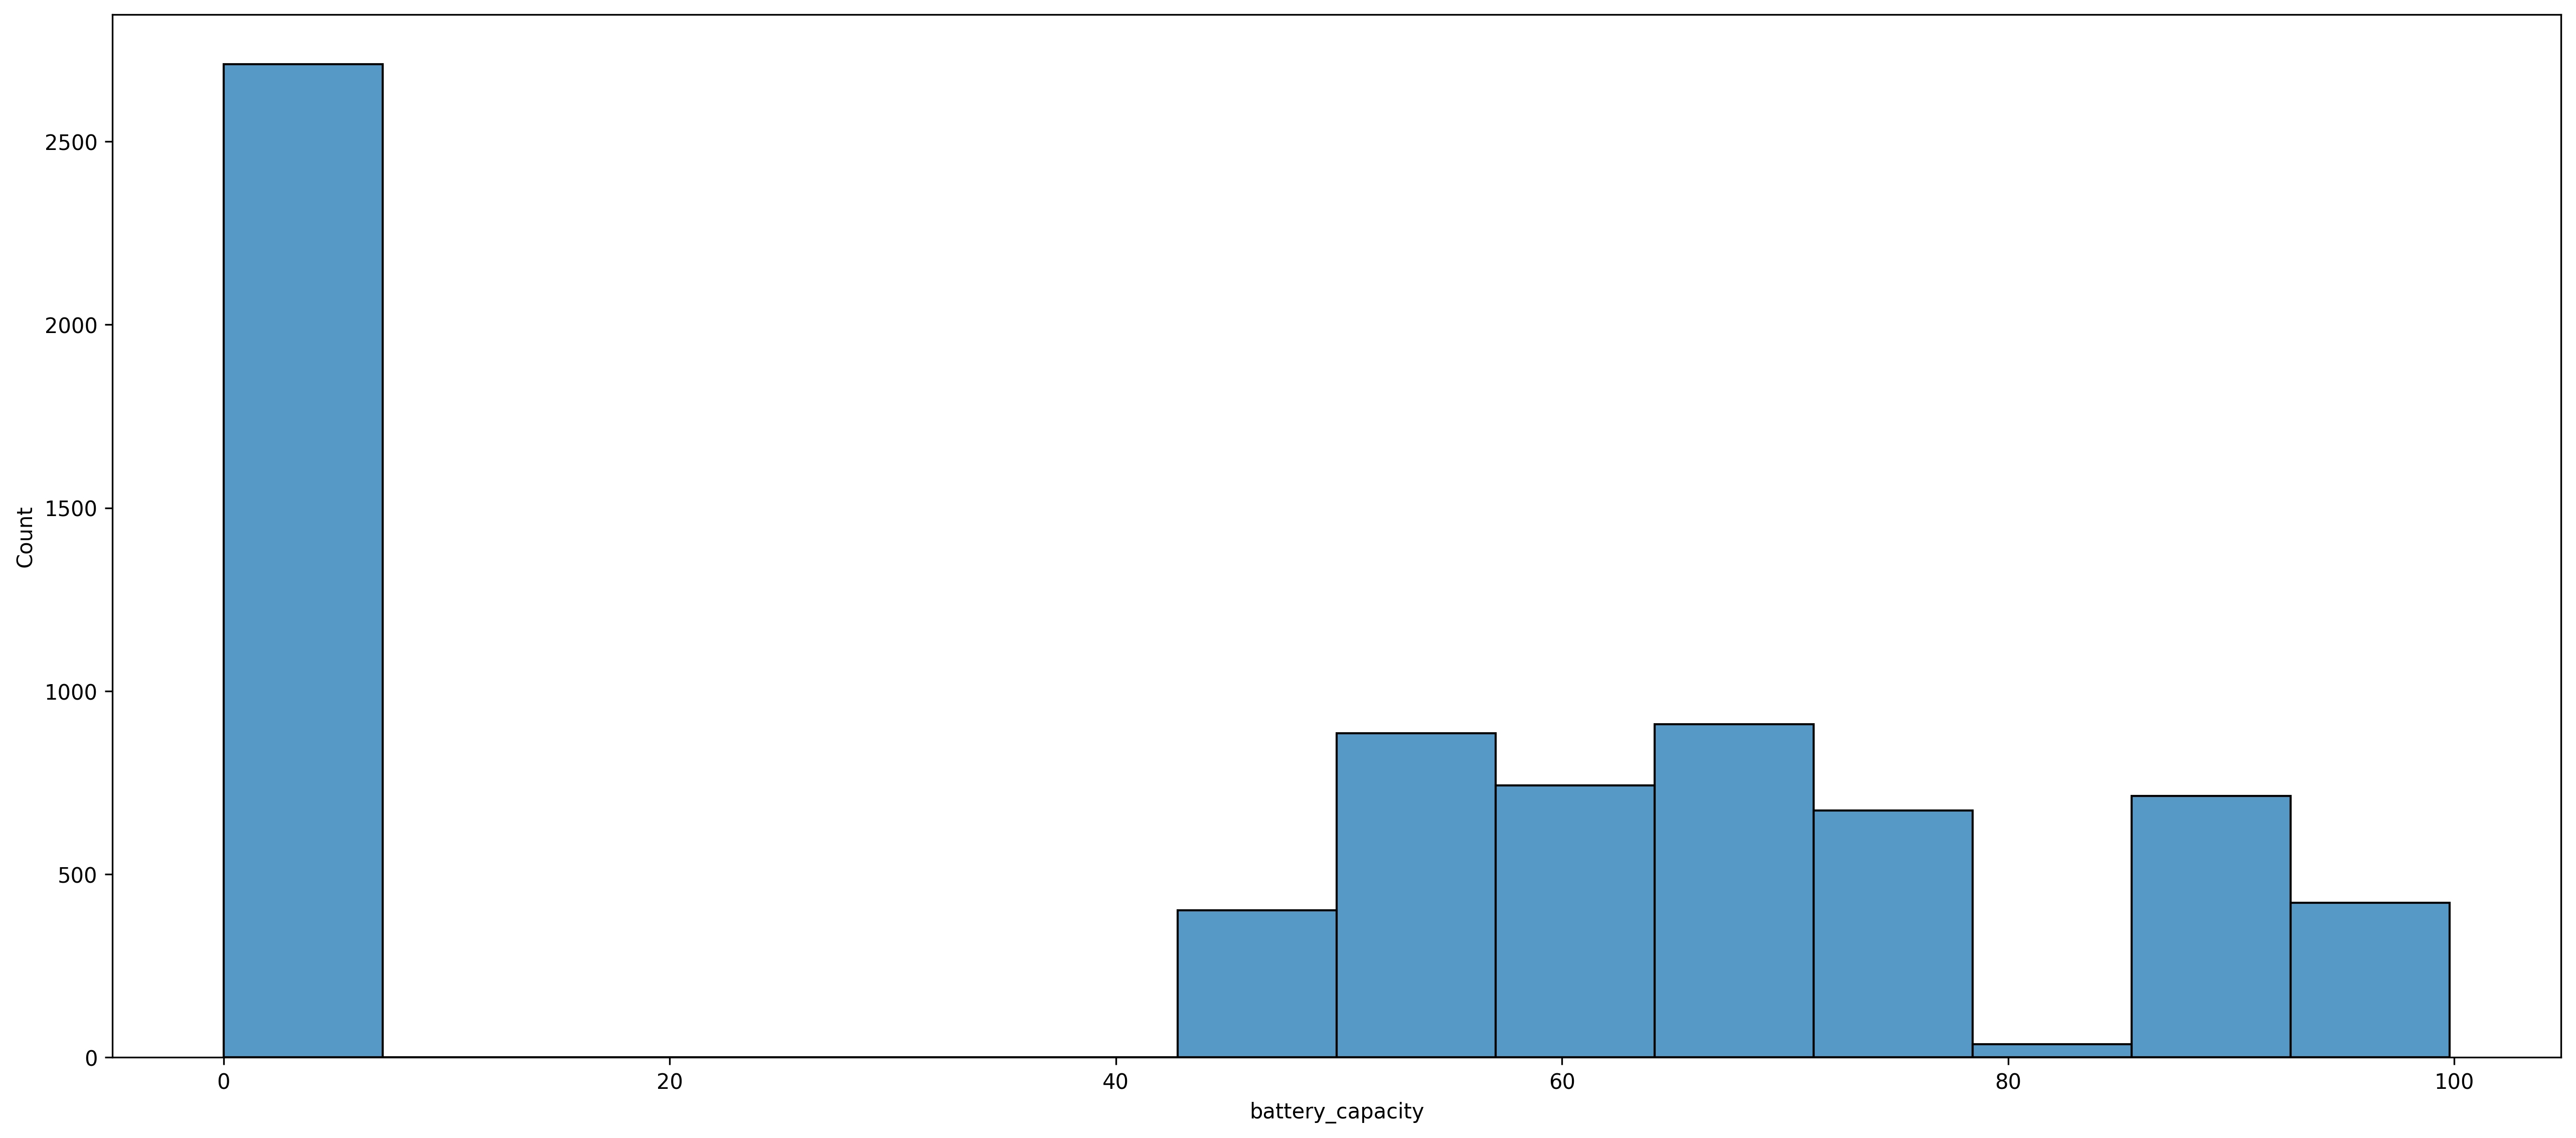

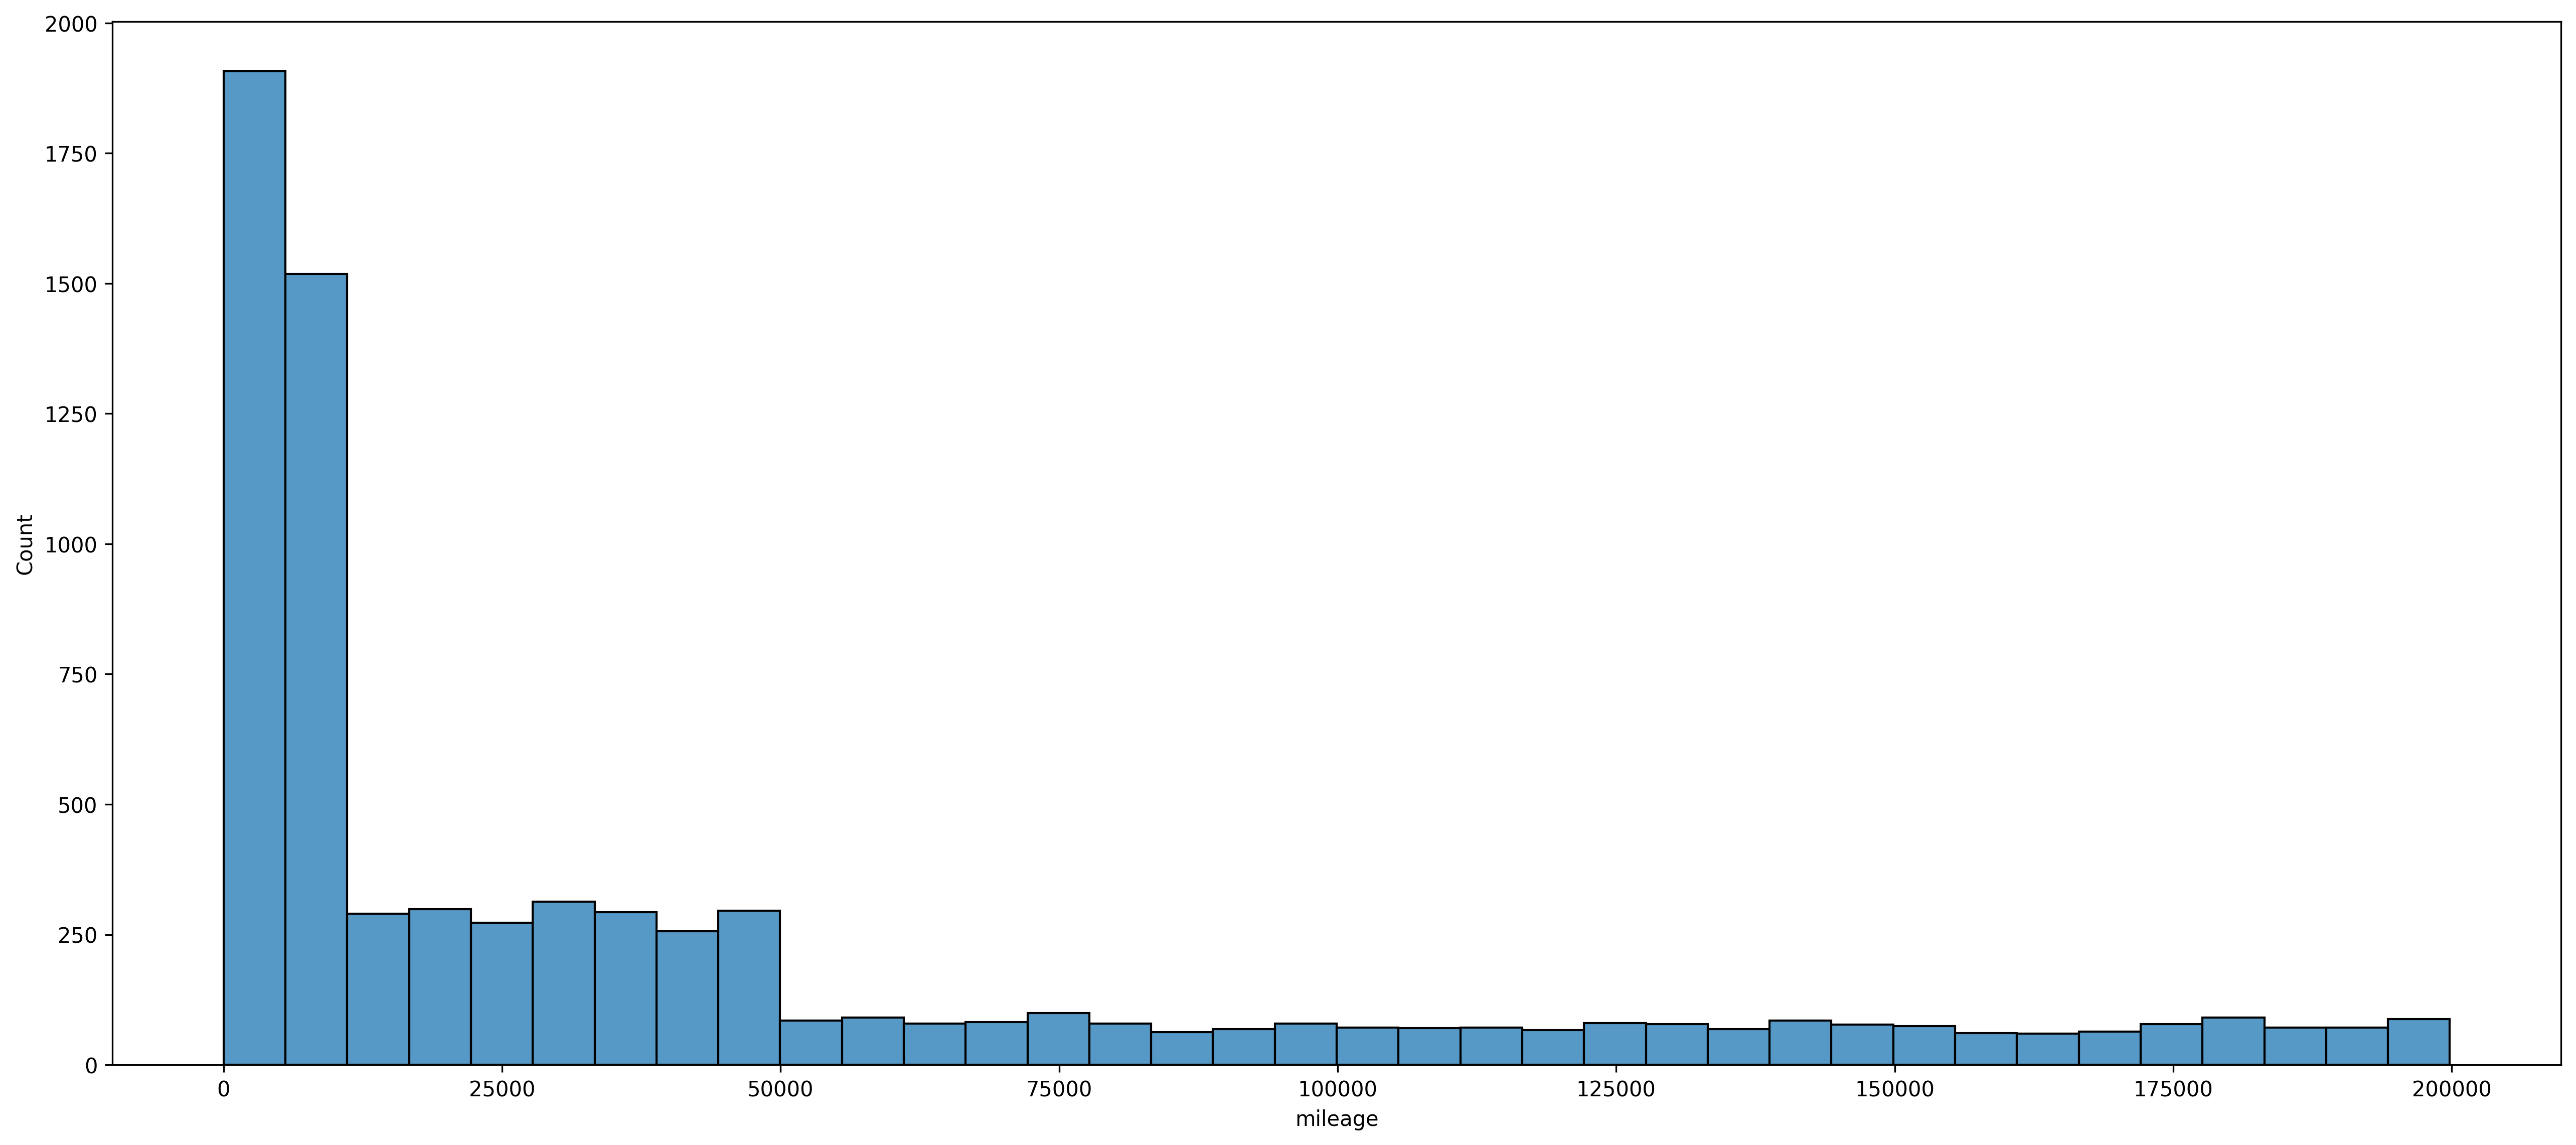

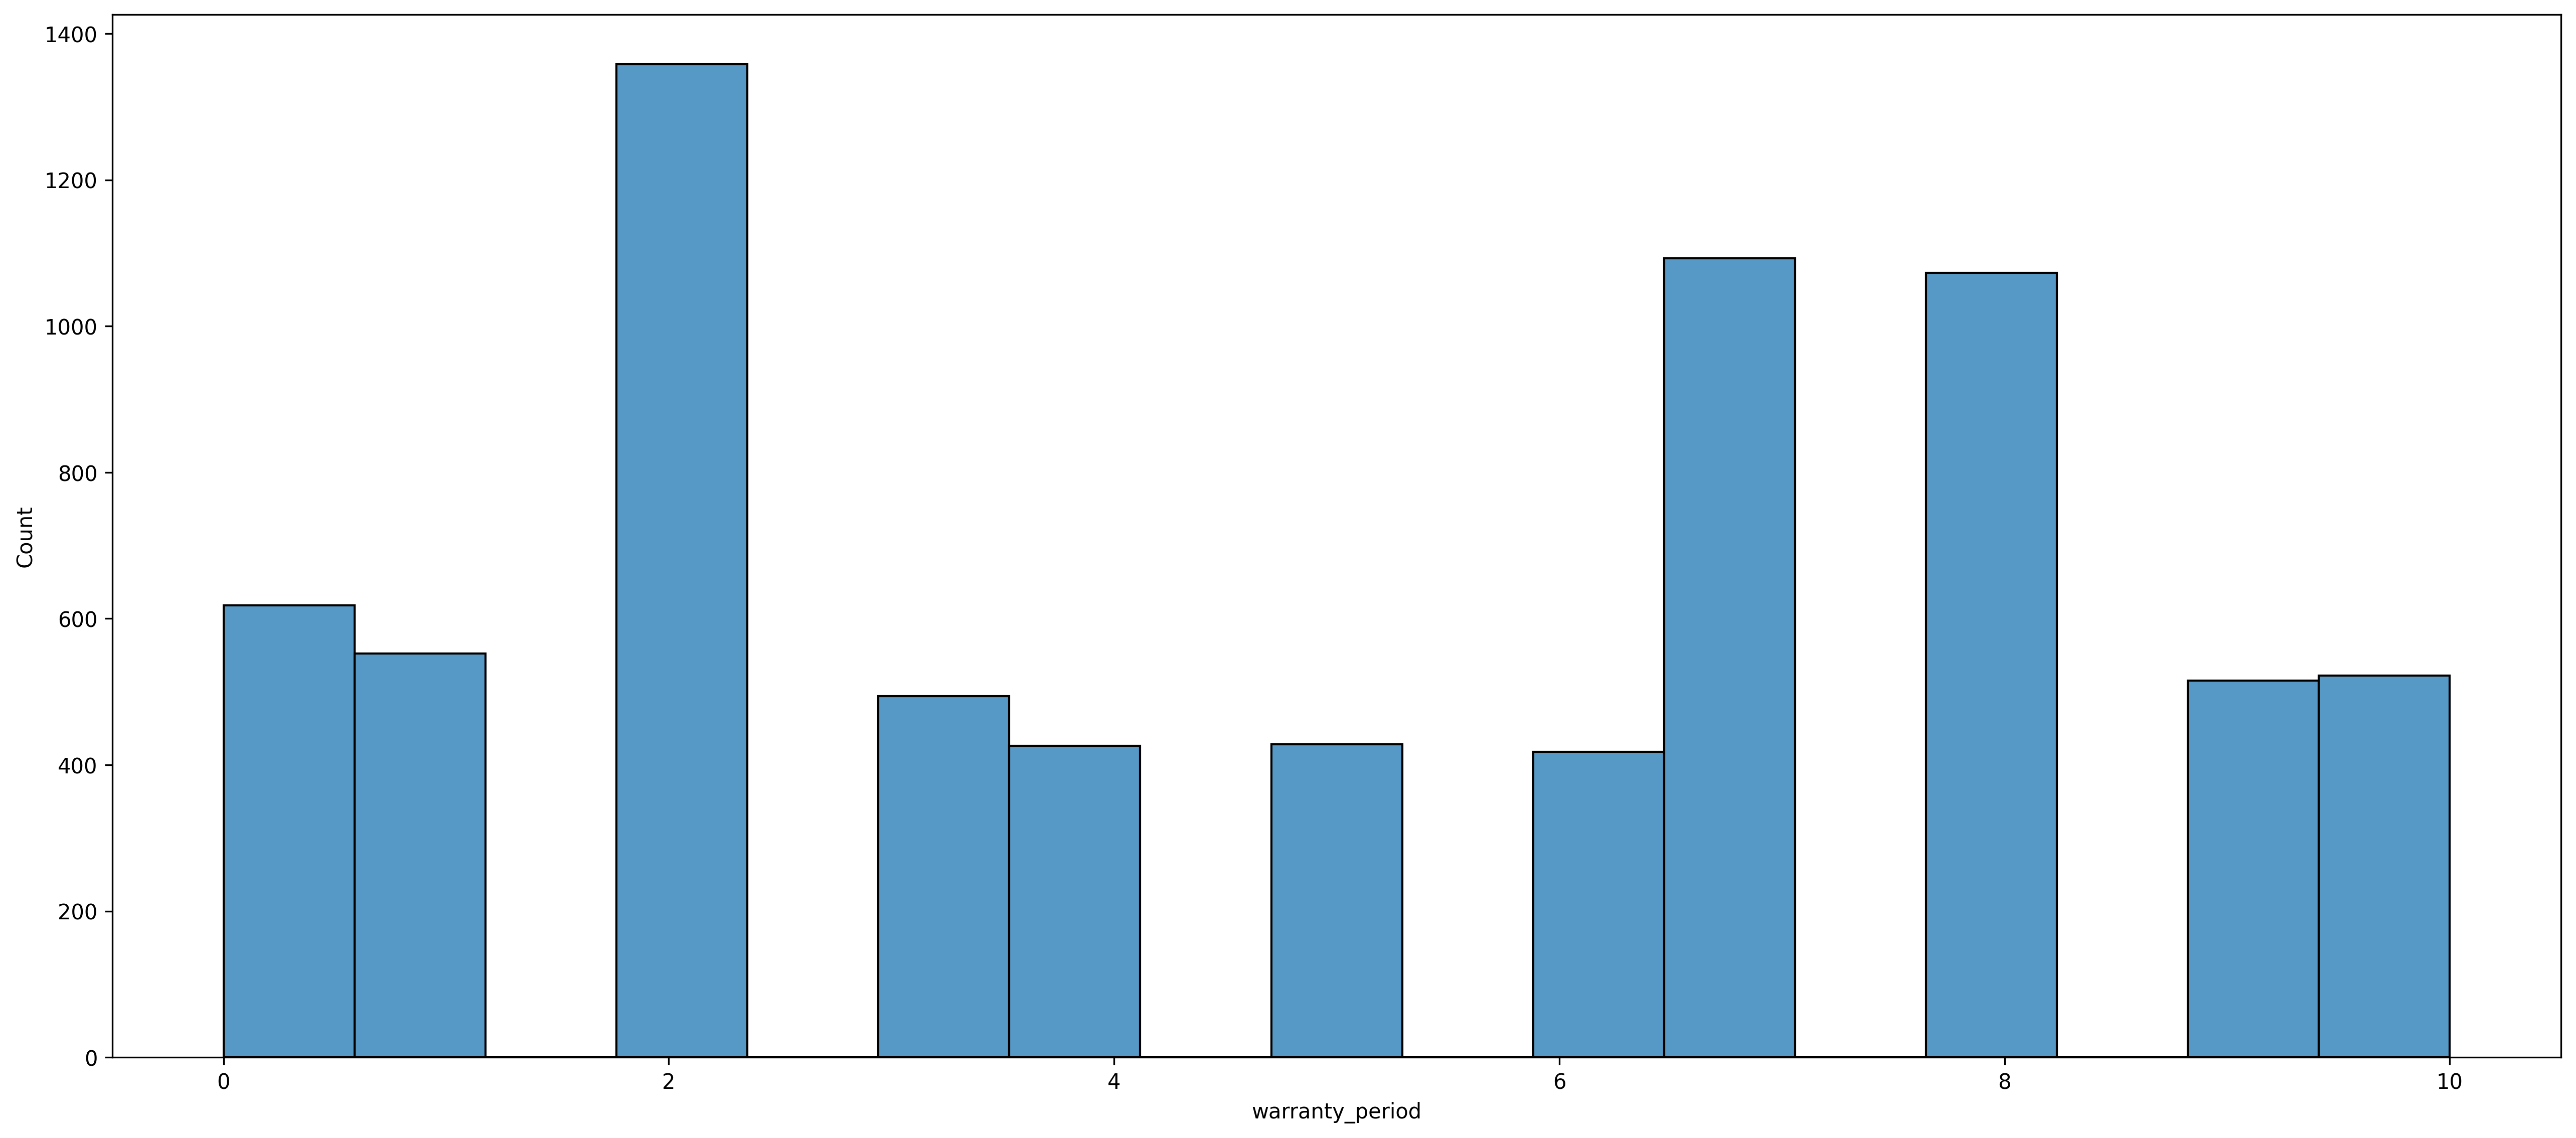

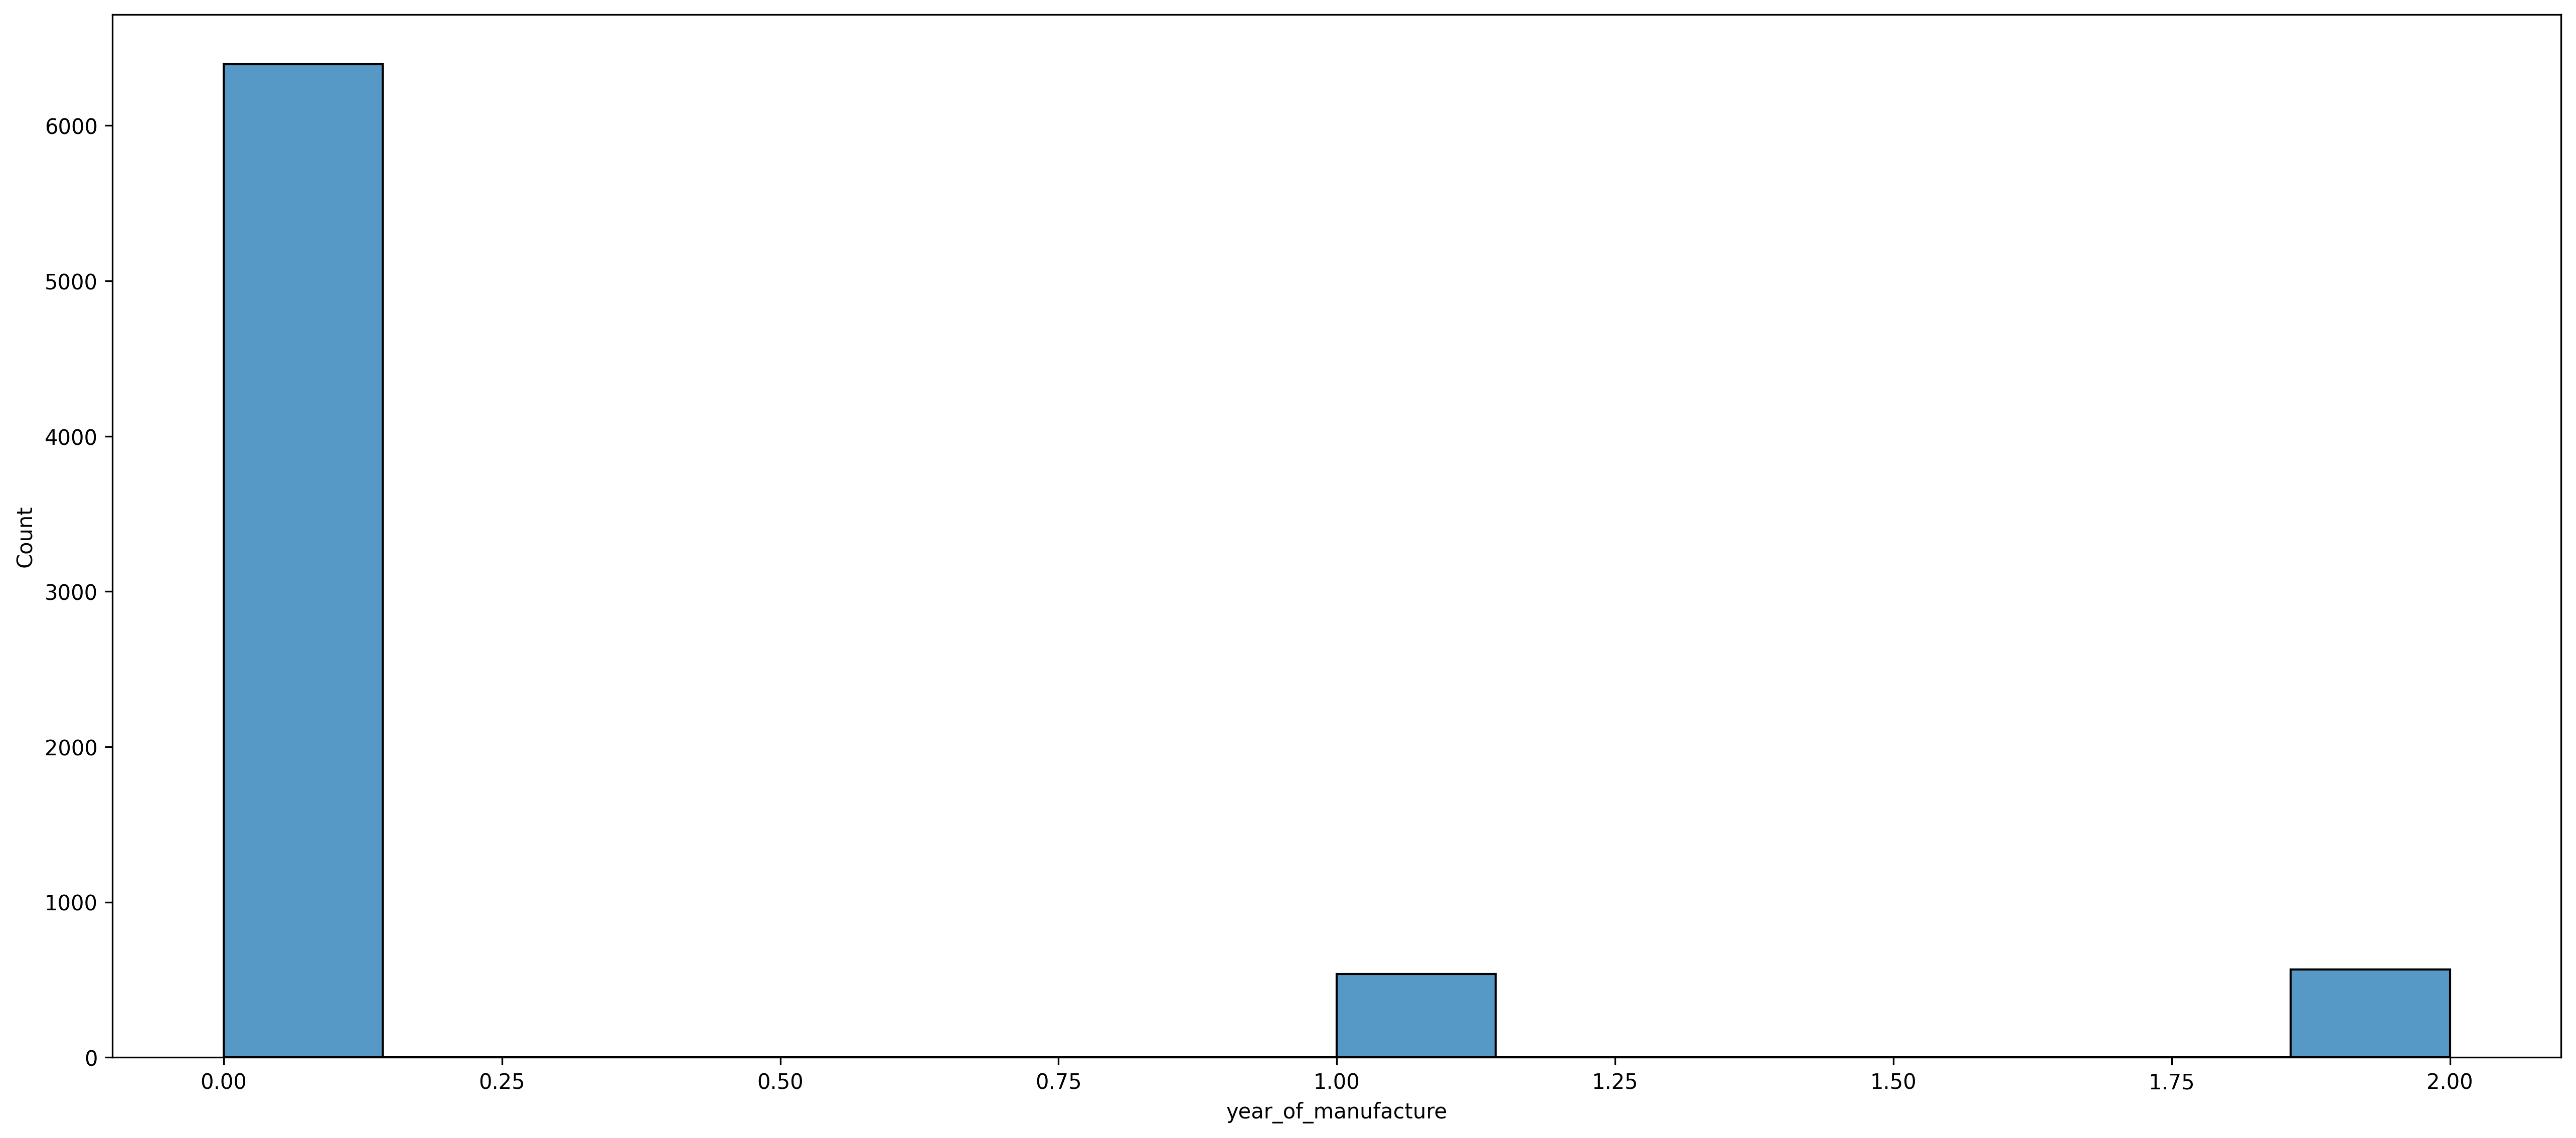

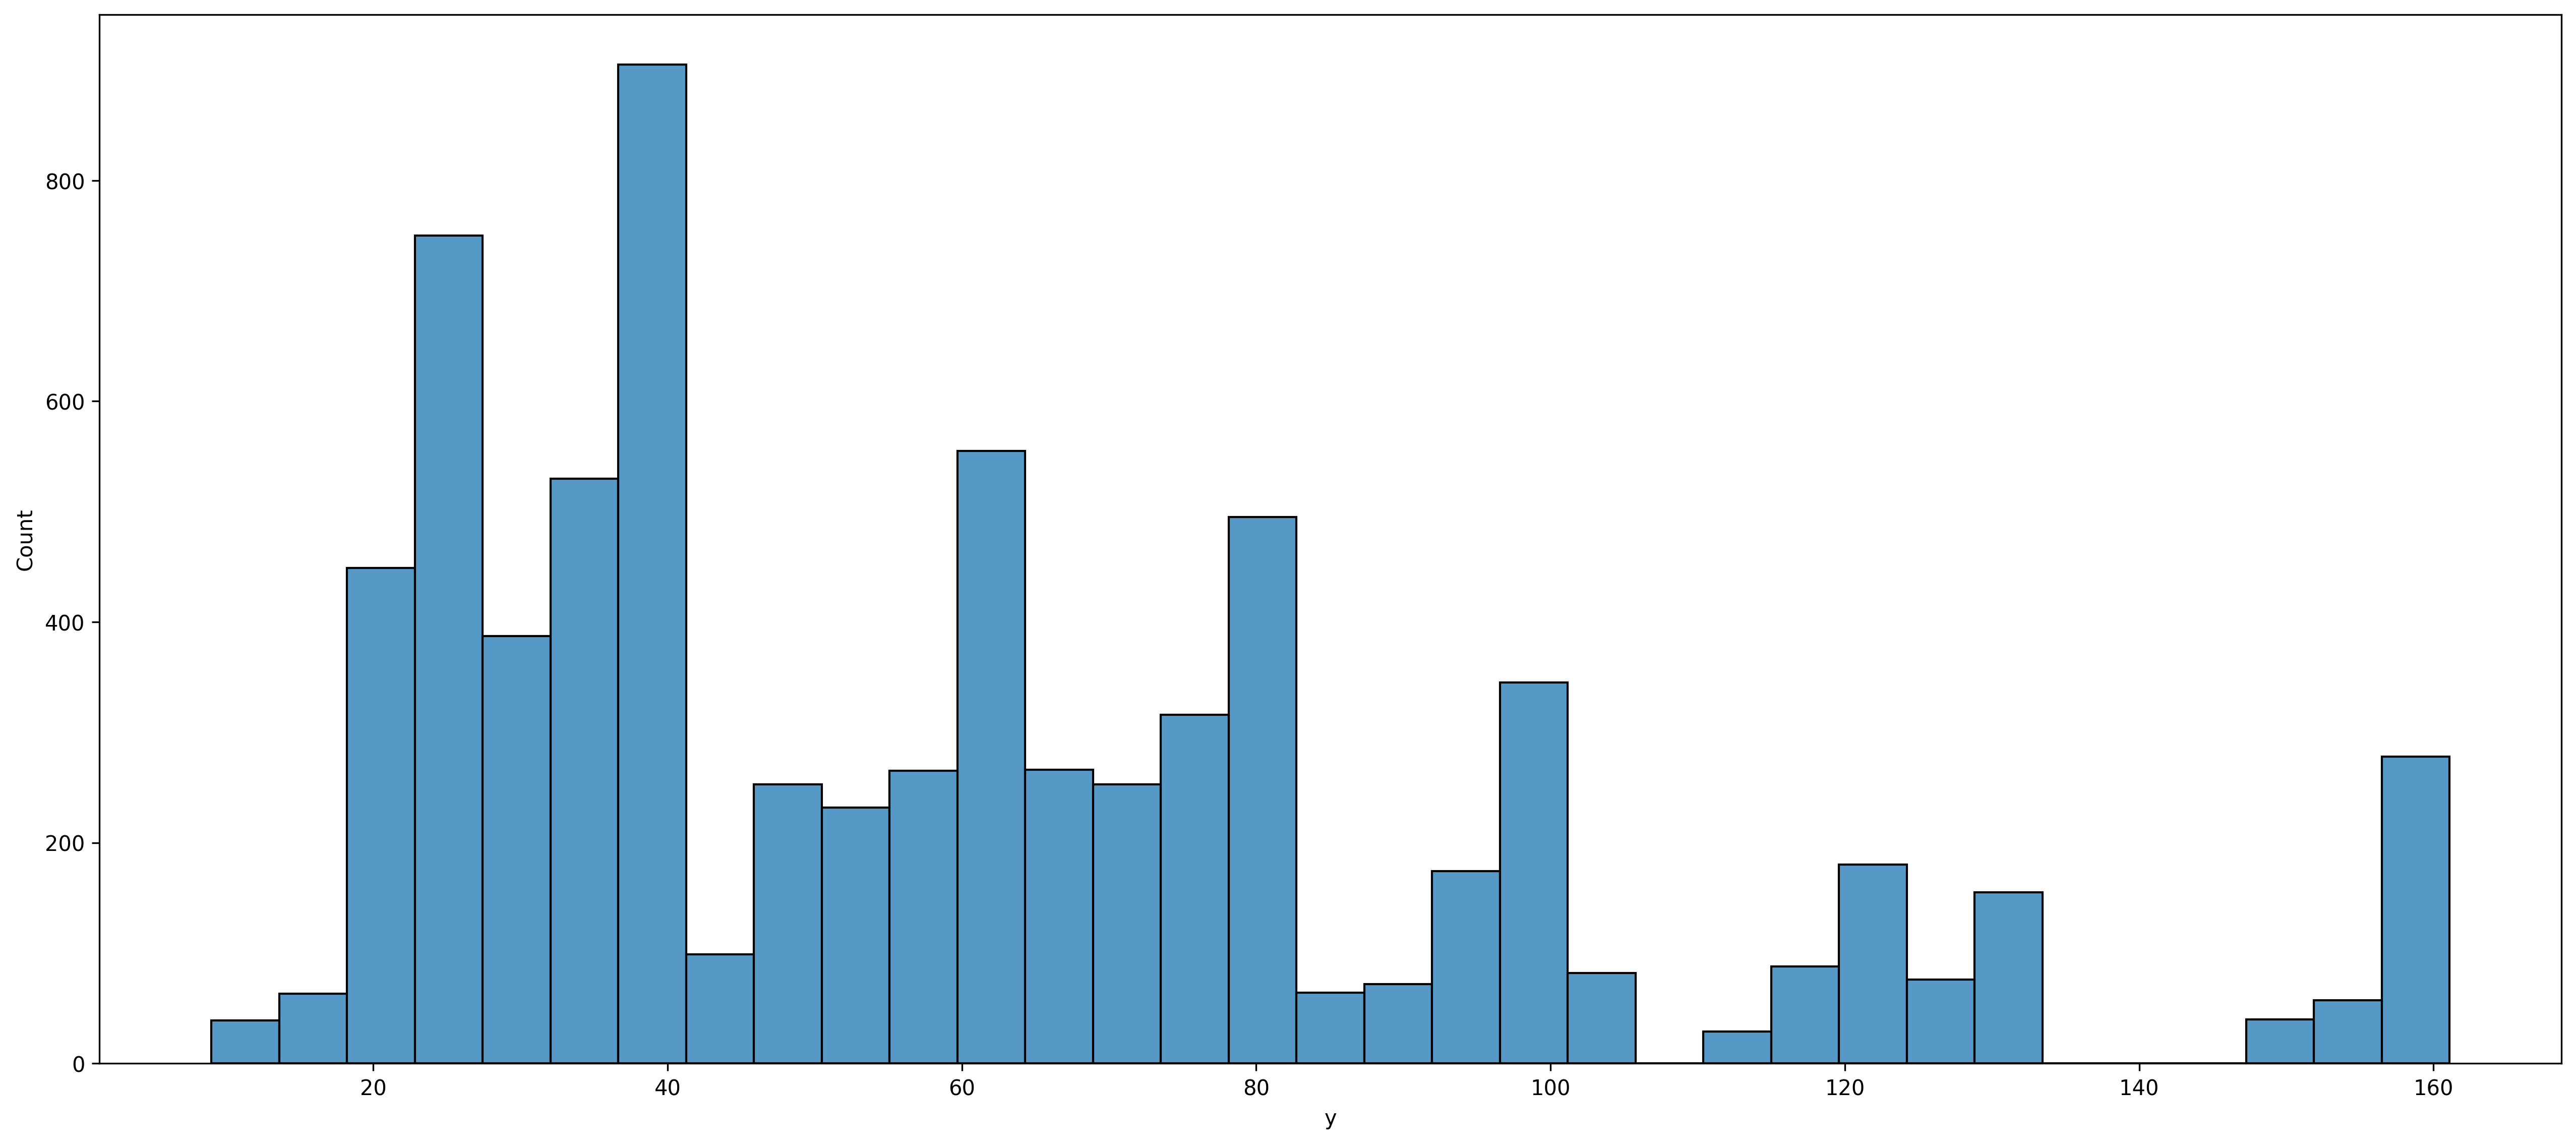

In [36]:
for col in train.select_dtypes(include='number').columns:
    sns.histplot(train[col])
    plt.show()

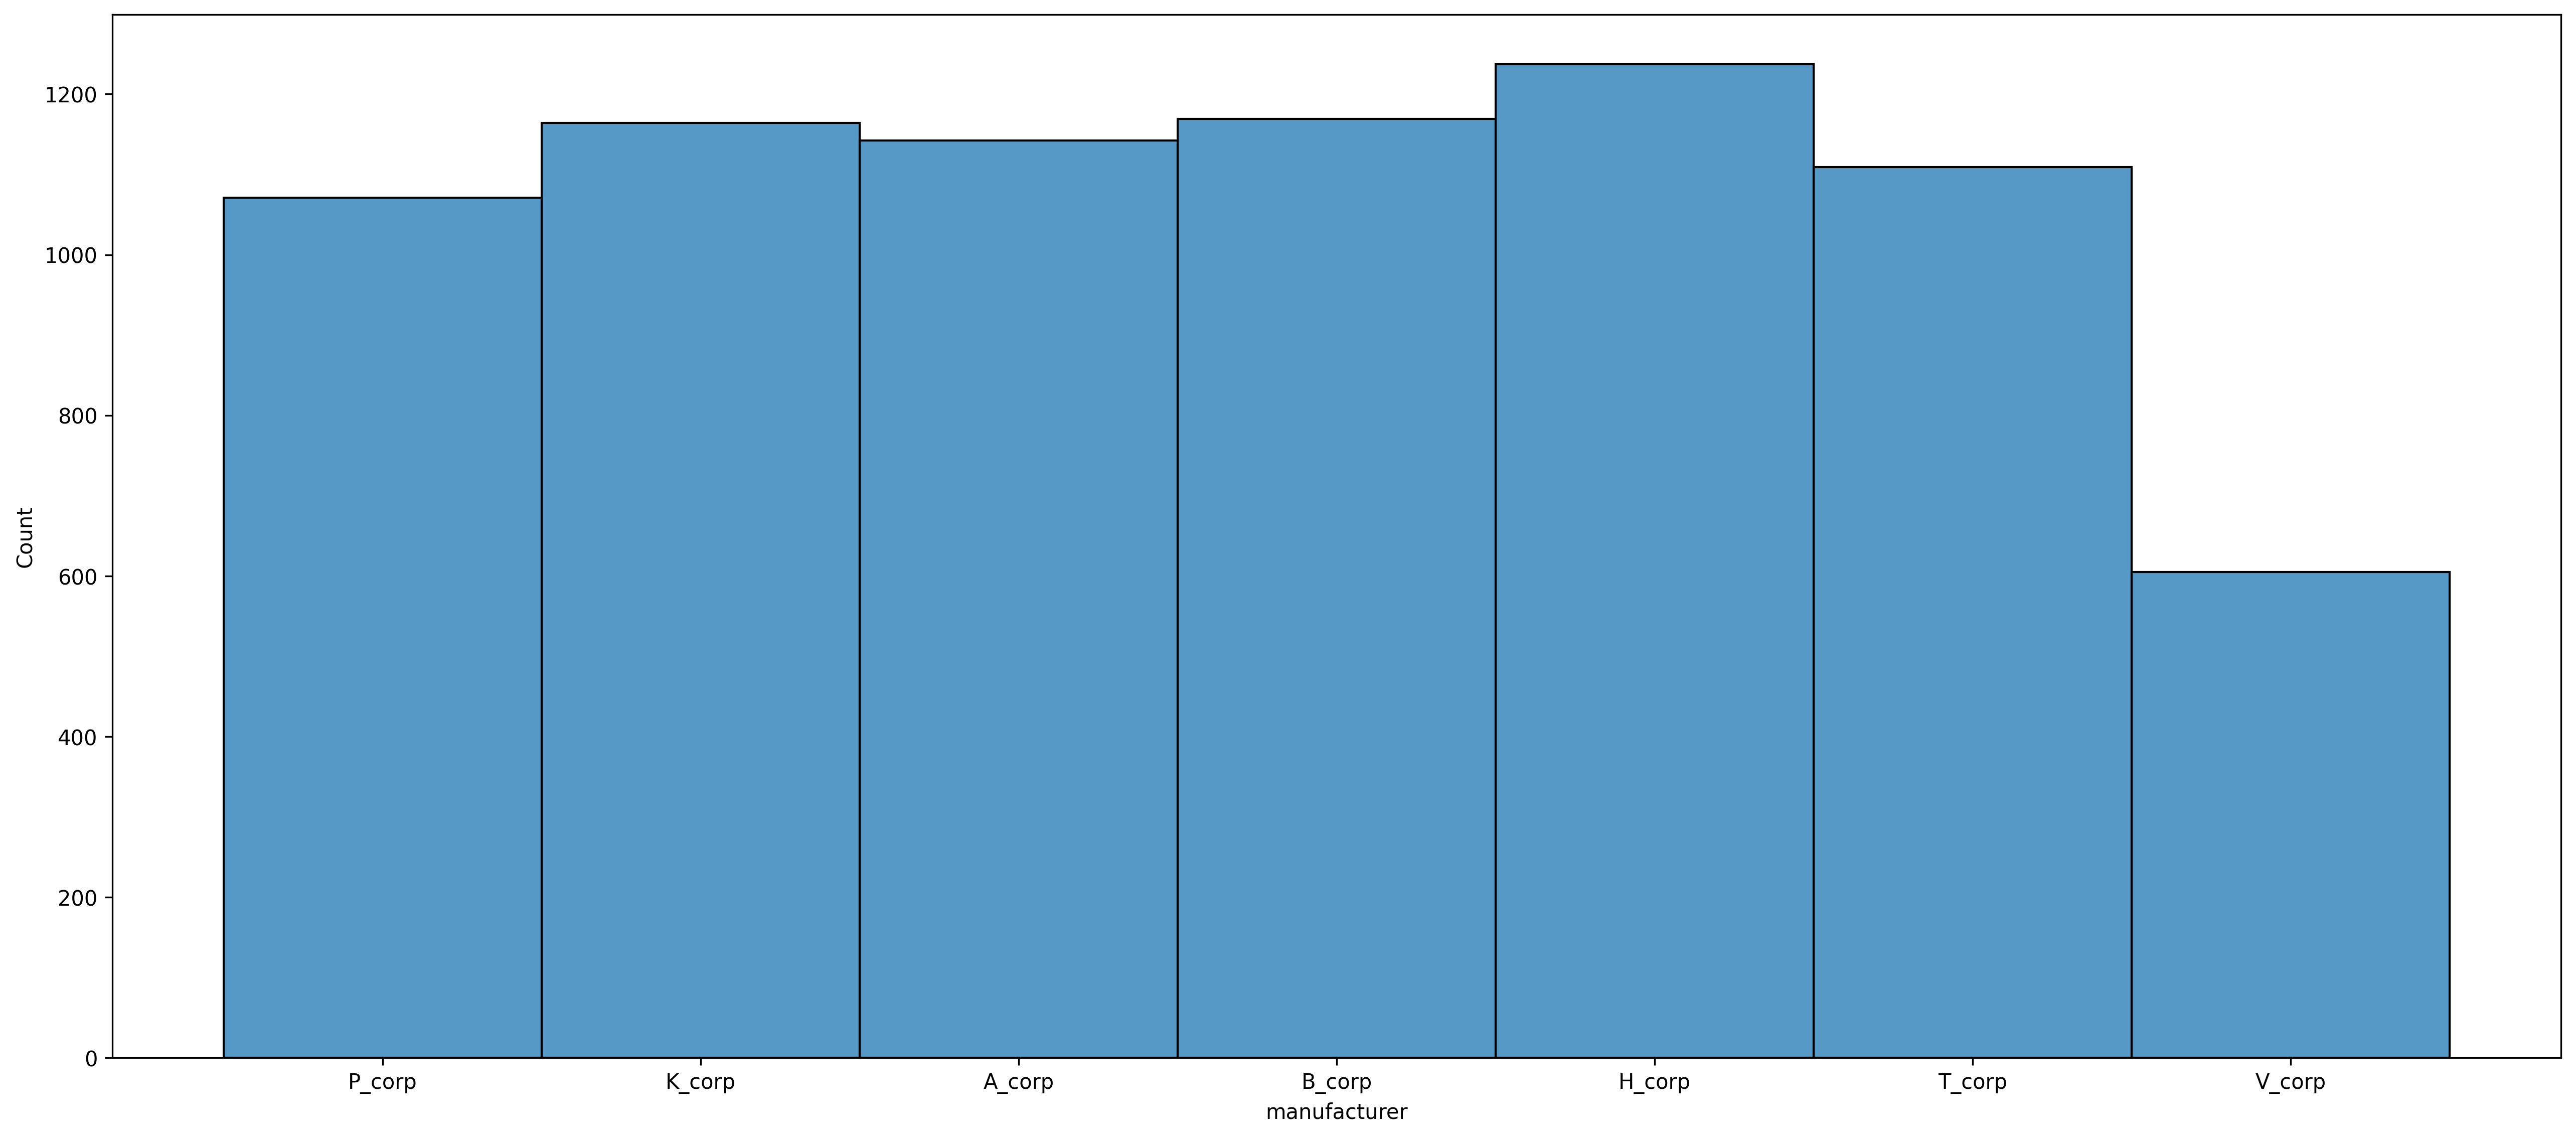

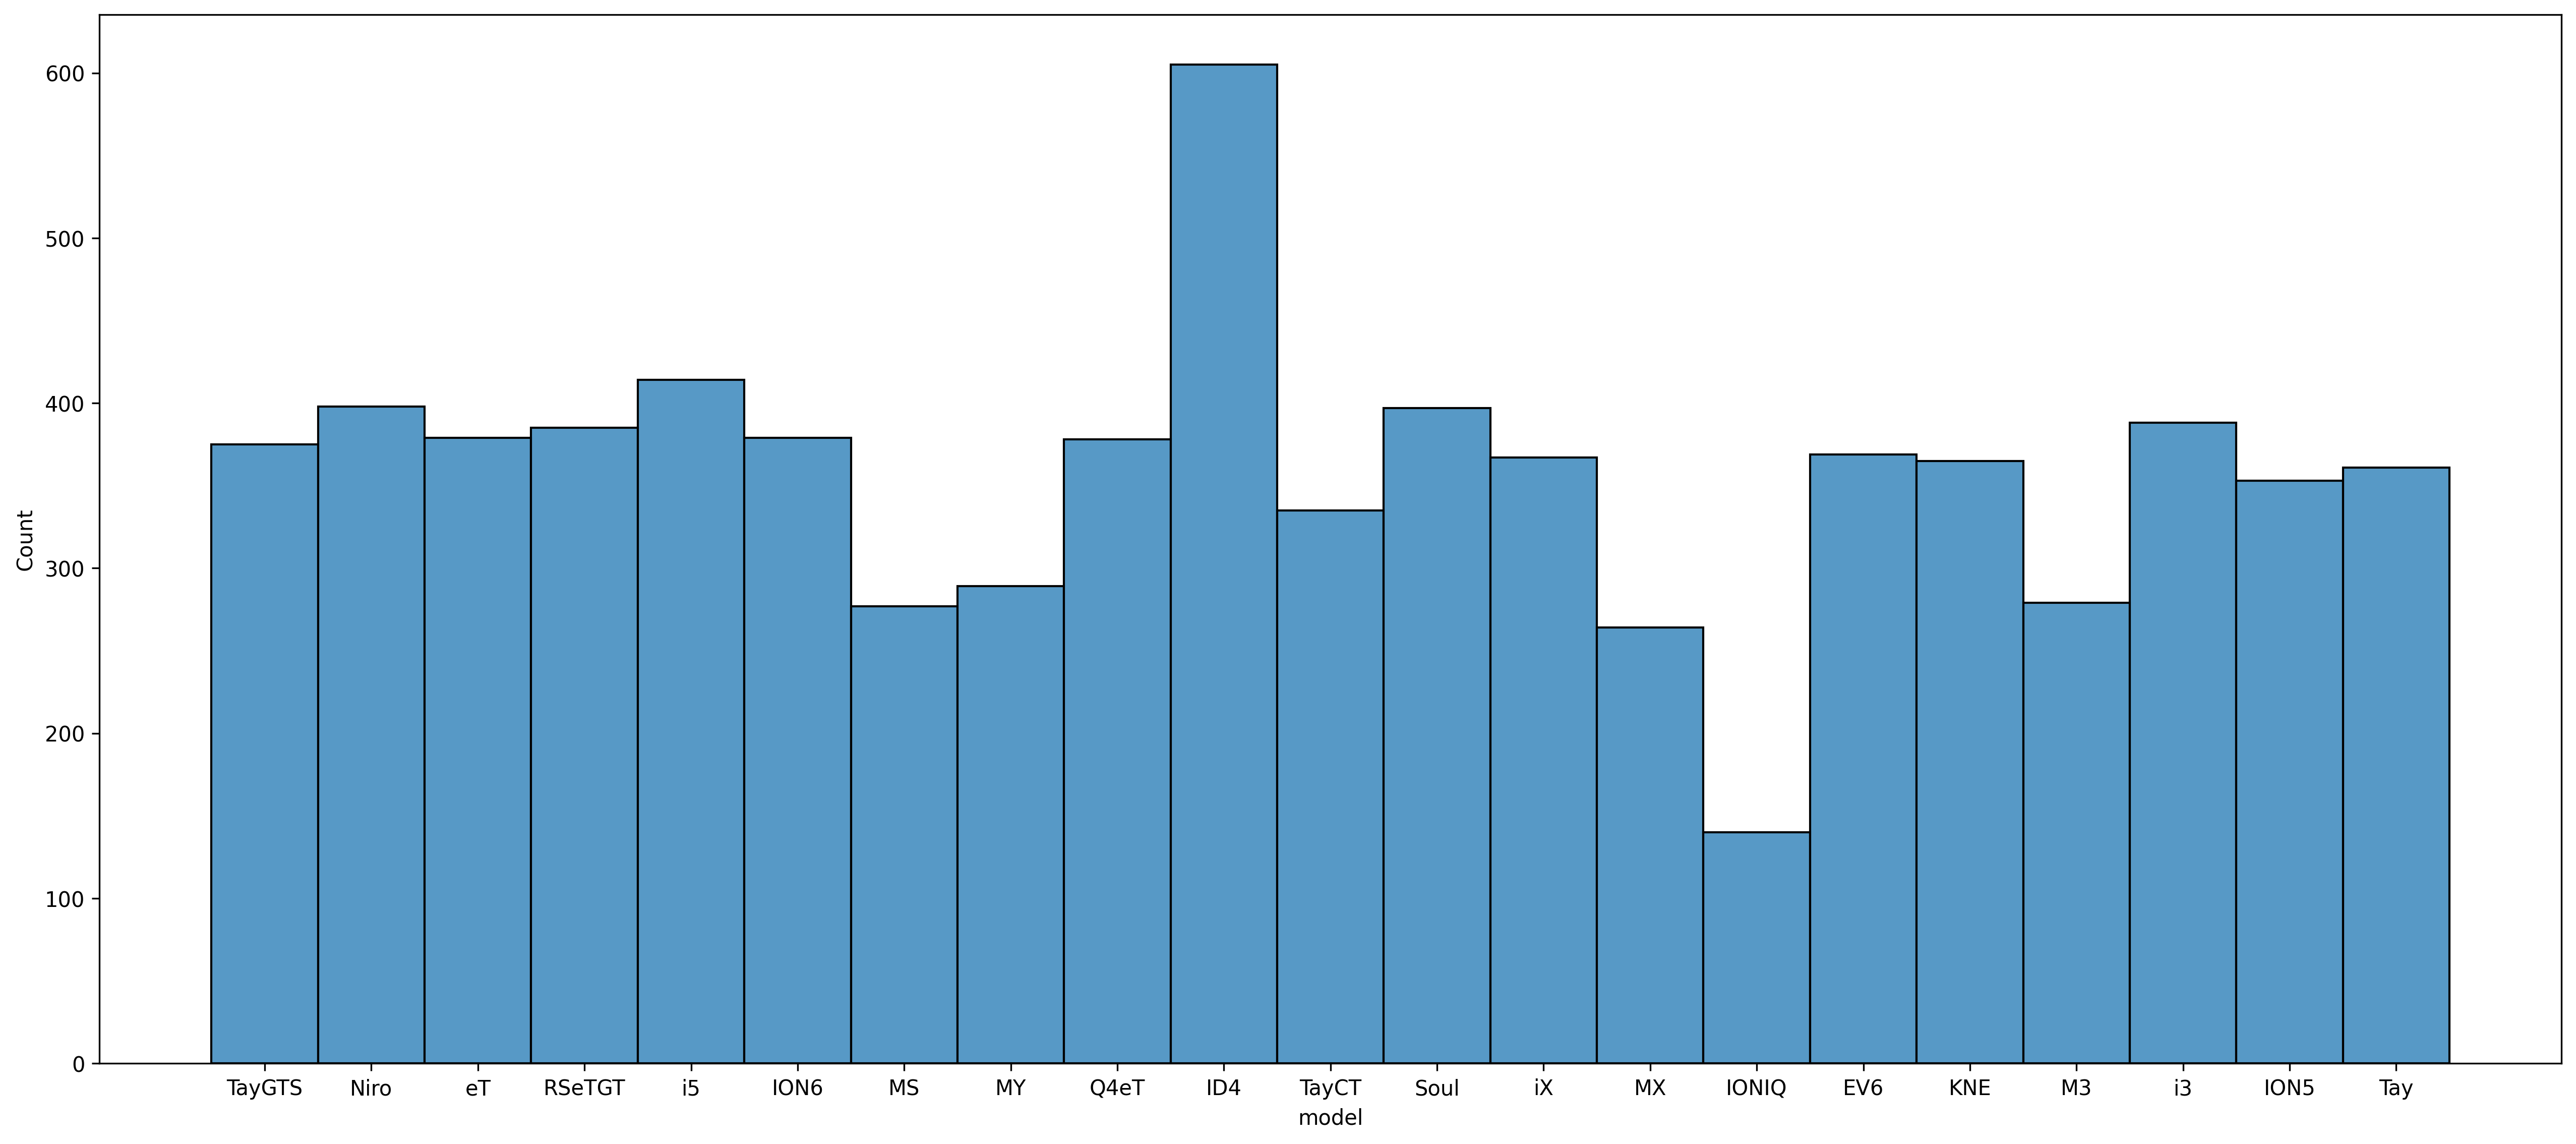

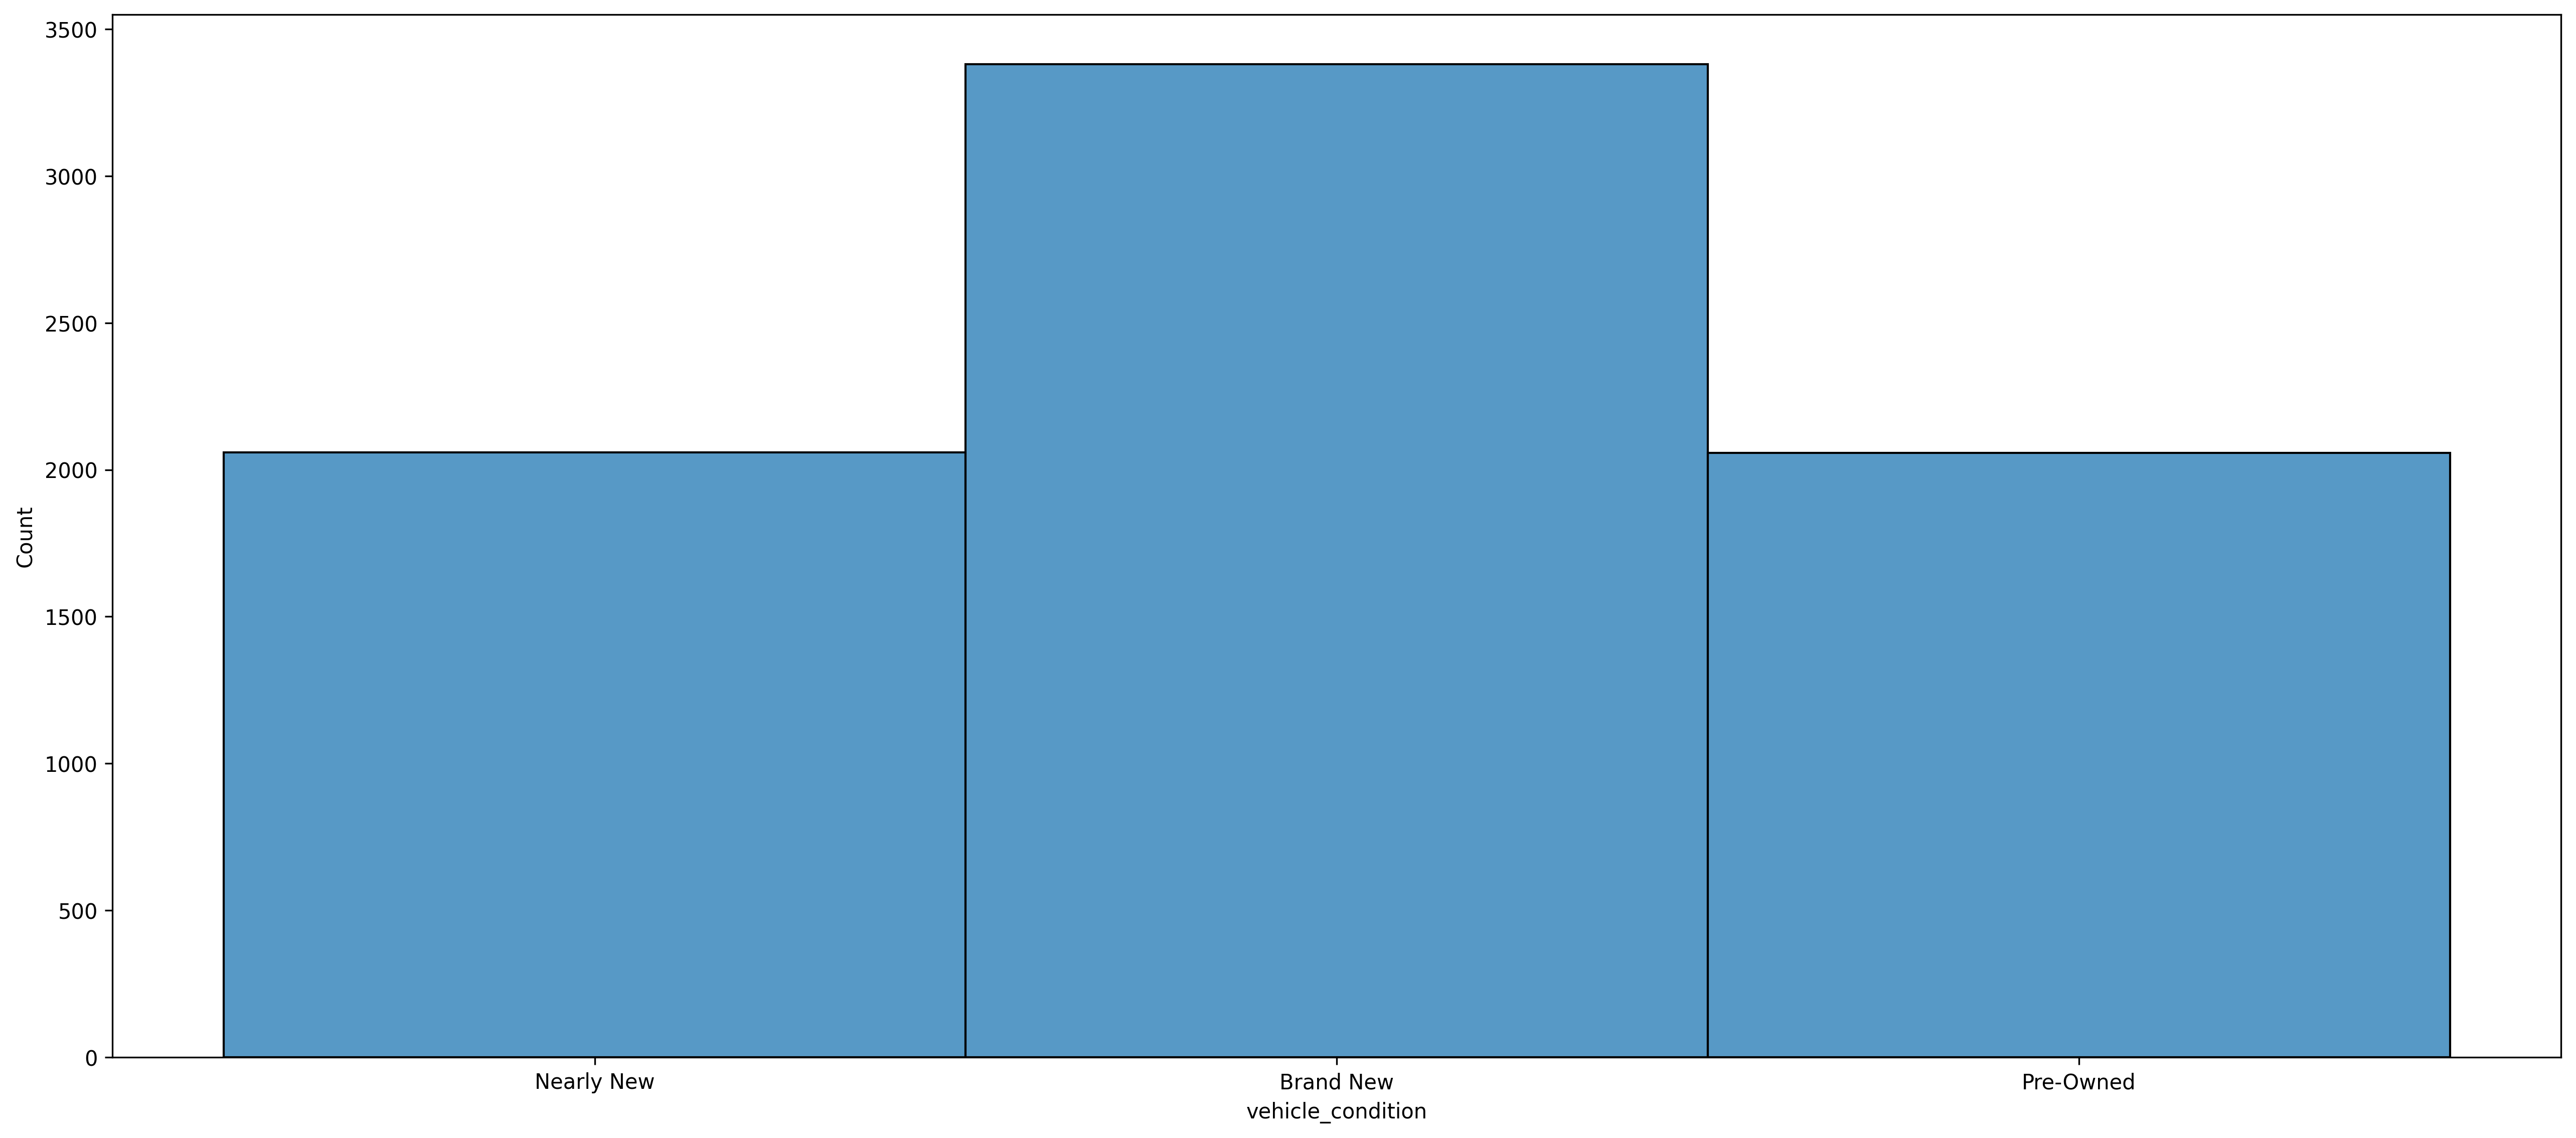

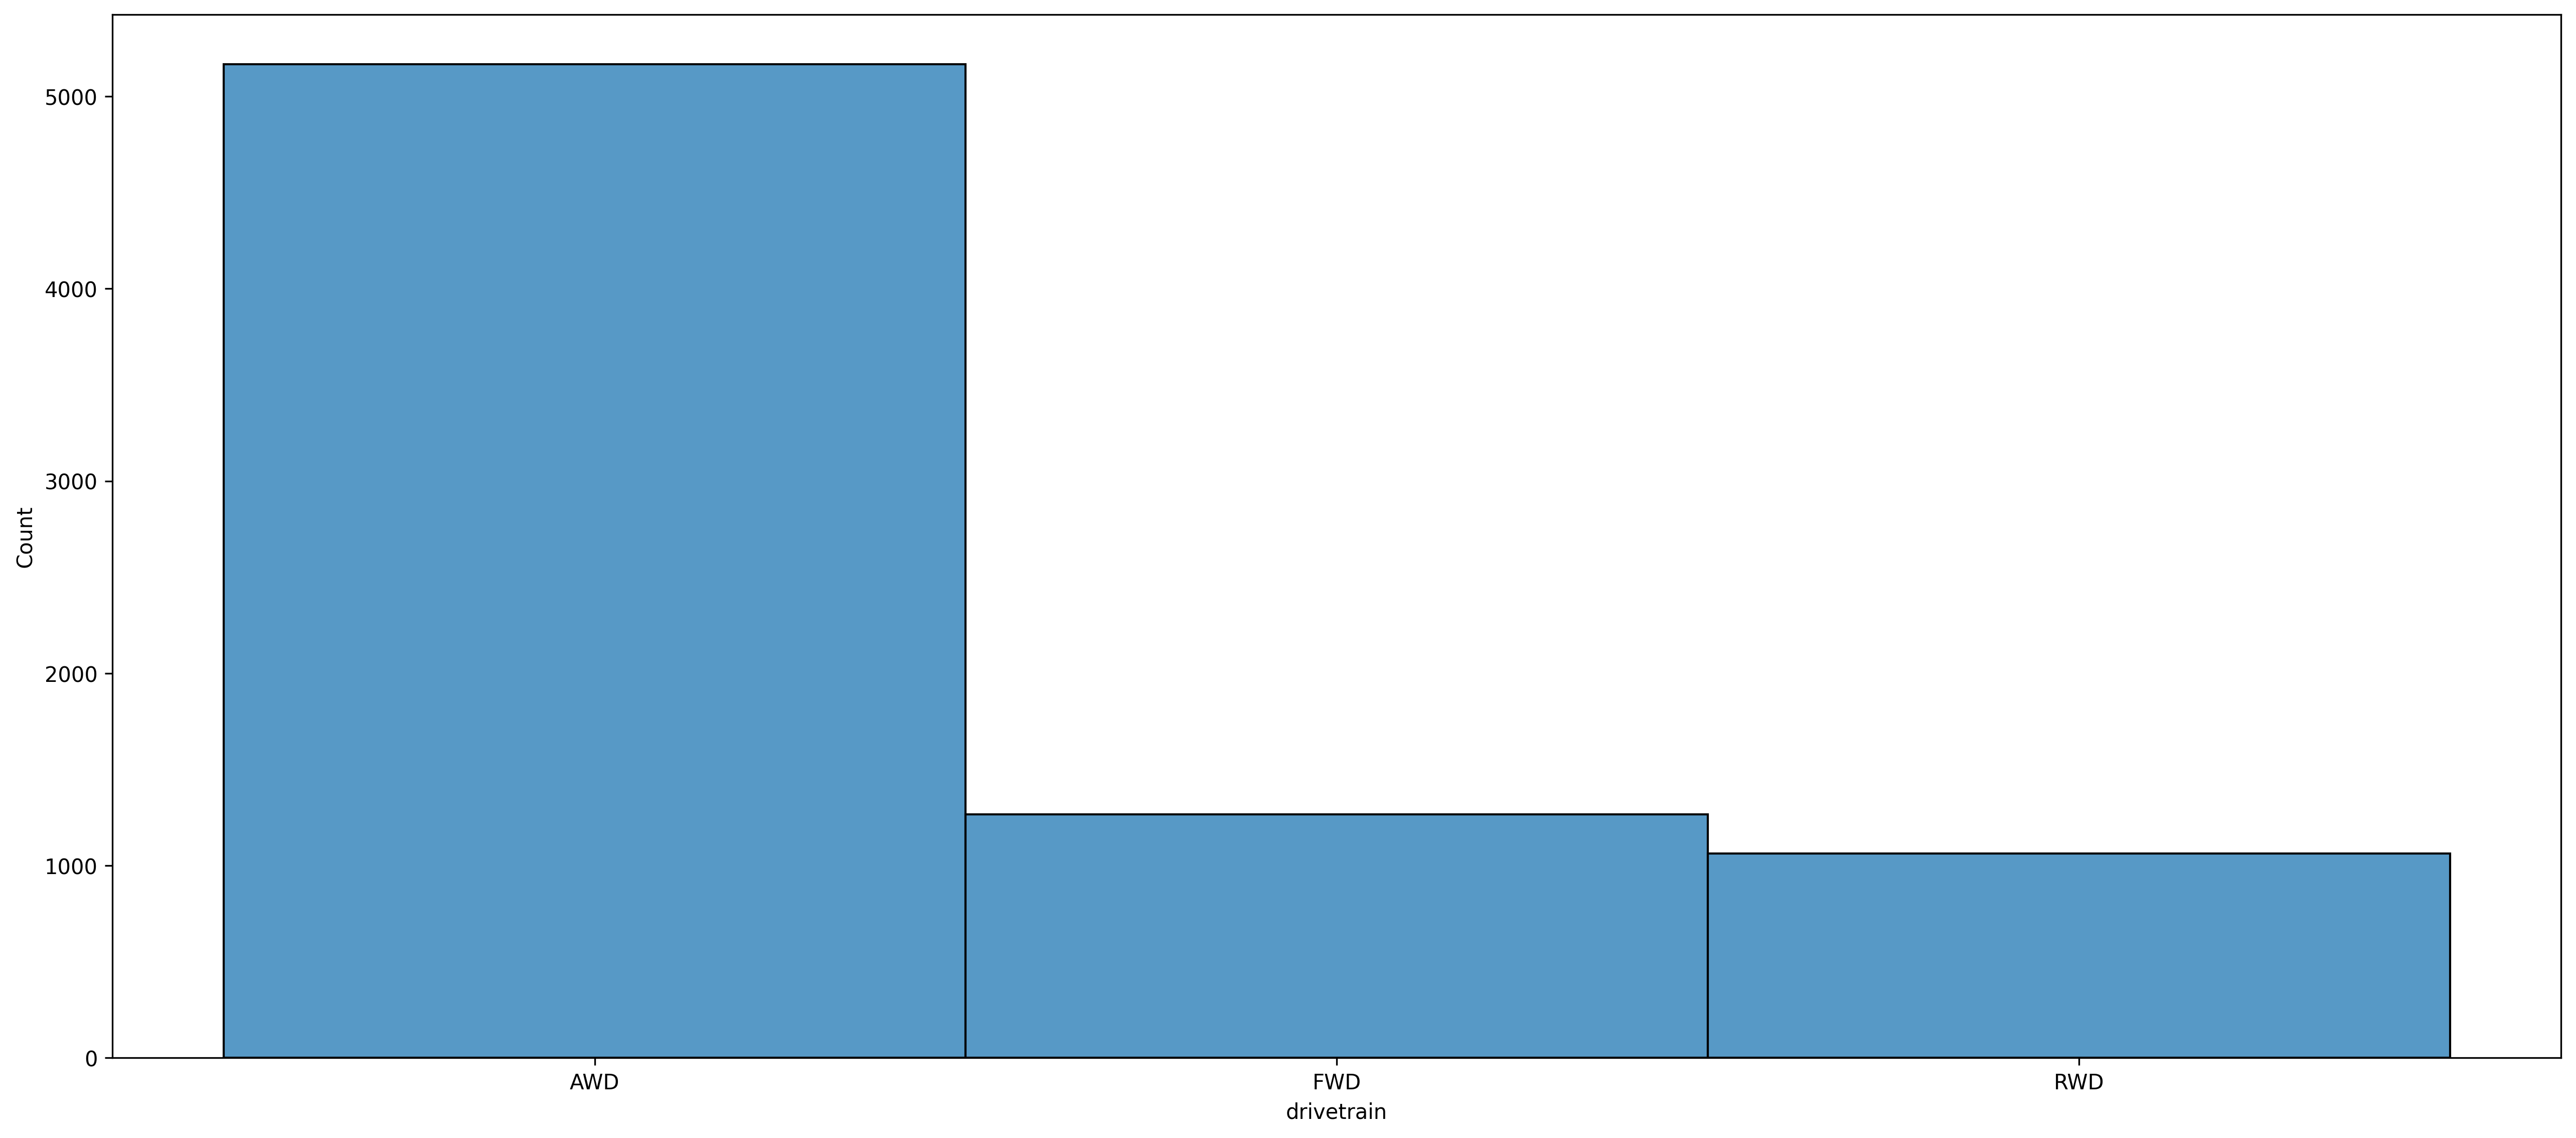

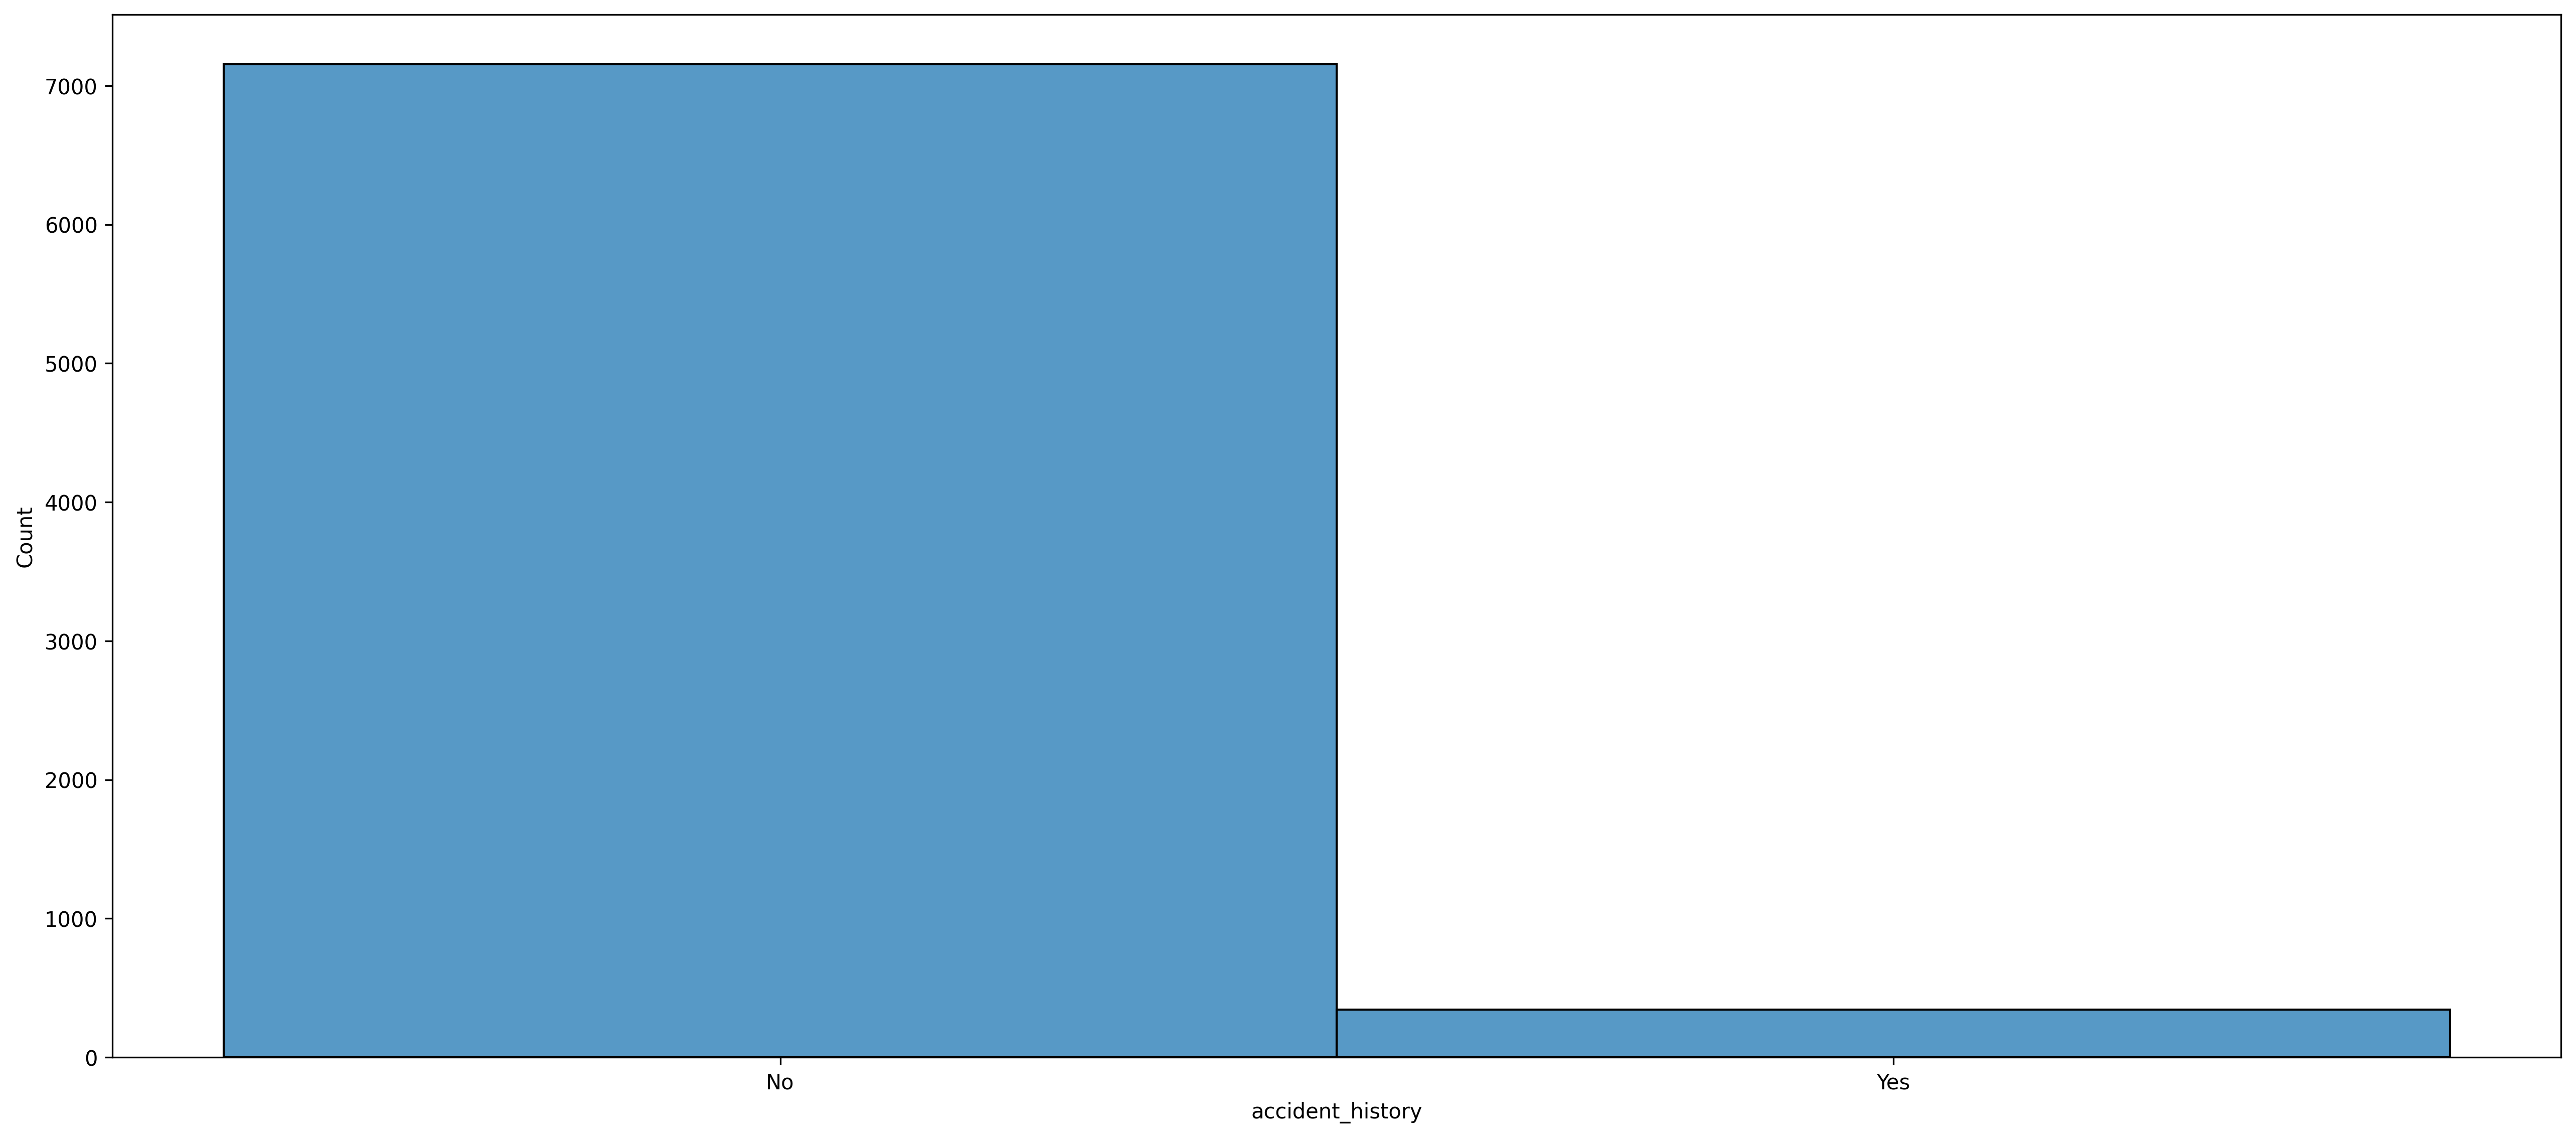

In [37]:
for col in train.select_dtypes(include='object').columns:
    sns.histplot(train[col])
    plt.show()

In [38]:
combined = pd.concat([train,test], axis=0, ignore_index=True)
FEATURES = combined.columns.drop("y")
CATS = []
HIGH_CARDINALITY = []

In [52]:
print(f"THE {len(FEATURES)} BASIC FEATURES ARE:")
for c in FEATURES:
    ftype = "numerical"
    if combined[c].dtype=="object":
        CATS.append(c)
        combined[c] = combined[c].fillna("NAN")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        ftype = "categorical"
    if combined[c].dtype=="int64":
        combined[c] = combined[c].astype("int32")
    elif combined[c].dtype=="float64":
        combined[c] = combined[c].astype("float32")
        
    n = combined[c].nunique()
    print(f"{c} ({ftype}) with {n} unique values")
    if n>=25: HIGH_CARDINALITY.append(c)
    
train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

THE 9 BASIC FEATURES ARE:
manufacturer (numerical) with 7 unique values
model (numerical) with 21 unique values
vehicle_condition (numerical) with 3 unique values
battery_capacity (numerical) with 203 unique values
drivetrain (numerical) with 3 unique values
mileage (numerical) with 7633 unique values
warranty_period (numerical) with 11 unique values
accident_history (numerical) with 2 unique values
year_of_manufacture (numerical) with 3 unique values


In [53]:
train

,manufacturer,model,vehicle_condition,battery_capacity,drivetrain,mileage,warranty_period,accident_history,year_of_manufacture,y
0,0,0,0,86.077003,0,13642,0,0,2,159.66
1,1,1,0,56.000000,1,10199,6,0,0,28.01
2,2,2,1,91.199997,0,2361,7,0,0,66.27
3,2,3,0,0.000000,0,21683,3,0,0,99.16
4,3,4,2,61.018002,0,178205,1,0,0,62.02
...,...,...,...,...,...,...,...,...,...,...
7492,4,19,1,0.000000,0,3773,10,0,0,35.95
7493,3,18,2,46.000000,2,135411,2,0,0,23.40
7494,0,10,1,0.000000,0,1363,2,0,0,120.00
7495,3,18,0,56.000000,2,39445,6,0,2,24.00


### Simple model with Catboost baseline

In [60]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=SEED,
    verbose=0
)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold

FOLD = 10
kf = KFold(n_splits=FOLD, shuffle=True, random_state=SEED)
oof = np.zeros(len(train))
pred = np.zeros(len(test))
rmse_list = []

for trn_idx, val_idx in kf.split(train):
    X_train, X_val = train.iloc[trn_idx], train.iloc[val_idx]
    y_train, y_val = train['y'].iloc[trn_idx], train['y'].iloc[val_idx]
    
    model.fit(X_train[FEATURES], y_train)
    oof[val_idx] = model.predict(X_val[FEATURES])
    pred += model.predict(test[FEATURES]) / FOLD
    
    rmse = root_mean_squared_error(y_val, oof[val_idx])
    print(f"RMSE: {rmse}")
    rmse_list.append(rmse)

print(f"RMSE: {np.mean(rmse_list)}")
# train['base_line'] = oof
# test['base_line'] = pred

RMSE: 1.4789852000170378
RMSE: 1.442665592096978
RMSE: 1.361879031487346
RMSE: 1.6182065183291983
RMSE: 1.3548857147370876
RMSE: 1.4408212191217389
RMSE: 1.3846634498046306
RMSE: 1.1510832572668073
RMSE: 1.3079517711296778
RMSE: 1.4086226423950168
RMSE: 1.394976439638552


In [66]:
import optuna
from optuna.trial import Trial
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold

def objective(trial: Trial, X, y):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'od_type': 'Iter',
        'od_wait': 25,
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'random_seed': SEED,
        'verbose': 0,
        # gpu
        'task_type': 'GPU',
        'devices': '0',
    }
    
    FOLD = 10
    kf = KFold(n_splits=FOLD, shuffle=True, random_state=SEED)
    oof = np.zeros(len(X))
    rmse_list = []

    for trn_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

        model = CatBoostRegressor(**param)
        model.fit(X_train[FEATURES], y_train)
        oof[val_idx] = model.predict(X_val[FEATURES])

        rmse = root_mean_squared_error(y_val, oof[val_idx])
        rmse_list.append(rmse)

    return np.mean(rmse_list)

FOLD = 10
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, train.drop(columns=['y']), train['y']), n_trials=100)

[I 2025-01-24 02:56:27,455] A new study created in memory with name: no-name-8806902e-0d88-45f4-b97a-61c81d77e50f
[I 2025-01-24 02:56:47,008] Trial 0 finished with value: 1.4720124790761493 and parameters: {'iterations': 334, 'learning_rate': 0.21246438856419259, 'depth': 6, 'l2_leaf_reg': 0.08181587130693191, 'bagging_temperature': 0.6481332494044408, 'random_strength': 0.5100119428149641}. Best is trial 0 with value: 1.4720124790761493.
[W 2025-01-24 02:57:06,517] Trial 1 failed with parameters: {'iterations': 629, 'learning_rate': 0.20223726175091905, 'depth': 6, 'l2_leaf_reg': 0.012155269907244906, 'bagging_temperature': 0.48380969040991073, 'random_strength': 0.8495870864781848} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "c:\Users\gus47\Desktop\workspace\dacon\ev-price-prediction\.venv\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\gus47\AppData\Local\Tem

KeyboardInterrupt: 

# Encoding

In [44]:
# one hot encoding
train = pd.get_dummies(train, columns=CATS)
test = pd.get_dummies(test, columns=CATS)
train_X, valid_X, train_y, valid_y = train_test_split(train.drop("y", axis=1), train["y"], test_size=0.2, random_state=SEED)

In [47]:
display(train)
display(test)

,battery_capacity,mileage,warranty_period,year_of_manufacture,y,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_20,vehicle_condition_0,vehicle_condition_1,vehicle_condition_2,drivetrain_0,drivetrain_1,drivetrain_2,accident_history_0,accident_history_1
0,86.077003,13642,0,2,159.66,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1,56.000000,10199,6,0,28.01,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False
2,91.199997,2361,7,0,66.27,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
3,0.000000,21683,3,0,99.16,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
4,61.018002,178205,1,0,62.02,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,0.000000,3773,10,0,35.95,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False
7493,46.000000,135411,2,0,23.40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
7494,0.000000,1363,2,0,120.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
7495,56.000000,39445,6,2,24.00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False


,battery_capacity,mileage,warranty_period,year_of_manufacture,y,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_20,vehicle_condition_0,vehicle_condition_1,vehicle_condition_2,drivetrain_0,drivetrain_1,drivetrain_2,accident_history_0,accident_history_1
0,76.093002,14057,2,0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1,90.000000,7547,8,0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
2,0.000000,7197,7,0,NaN,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True
3,68.478996,10357,7,1,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False
4,0.000000,7597,10,0,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,64.682999,117298,2,0,NaN,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
842,55.547001,72308,0,0,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
843,55.547001,124537,0,0,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
844,69.646004,15629,4,0,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False


In [58]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb, time

model = XGBRegressor(
    n_estimators=100,
    objective="reg:squarederror",
    random_state=SEED,
    tree_method='gpu_hist',
    gpu_id=0,
    predictor="gpu_predictor",
    verbose=0
)
model = LGBMRegressor(
    n_estimators=100,
    random_state=SEED,
    device="gpu",
    gpu_device_id=0,
)

In [51]:
FOLD = 5
kf = KFold(n_splits=FOLD, shuffle=True, random_state=SEED)
oof = np.zeros(len(train))
pred = np.zeros(len(test))
rmse_list = []

for trn_idx, val_idx in kf.split(train):
    X_train, X_val = train.iloc[trn_idx], train.iloc[val_idx]
    y_train, y_val = train['y'].iloc[trn_idx], train['y'].iloc[val_idx]
    
    model.fit(X_train, y_train)
    oof[val_idx] = model.predict(X_val)
    pred += model.predict(test) / FOLD
    
    rmse = root_mean_squared_error(y_val, oof[val_idx])
    rmse_list.append(rmse)

print(f"RMSE: {np.mean(rmse_list)}")

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 41
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.05 MB) transferred to GPU in 0.001008 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 62.221487
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in

In [48]:
rmse

0.2249572735820447

In [68]:
pred.shape, test.shape

((846,), (846, 10))

In [69]:
submission = pd.read_csv('sample_submission.csv')
submission['가격(백만원)'] = pred
submission.to_csv('submission.csv', index=False)